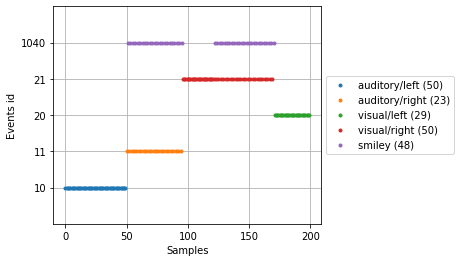

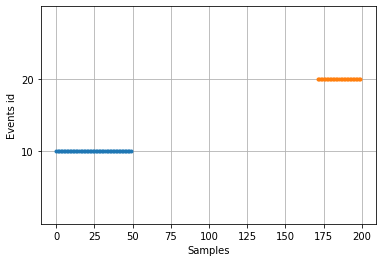

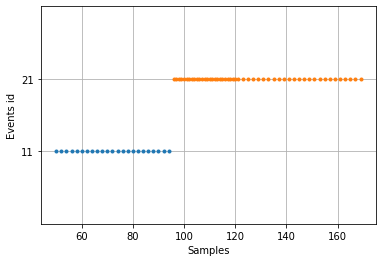

In [2]:
import io
import copy
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import mne
from pathlib import Path

#from pptx import Presentation
#from pptx.util import Inches


def streams2mne_digmont(cap, eeg_streams):

    ch_pos, ch_names = list(), list()
    for i, type in enumerate(eeg_streams):
        qstr = f"stream == '{type}'"
        for idx, row in cap26.query(qstr)[
            ["stream", "x", "y", "z"]
        ].iterrows():
            ch_pos.append(row[["x", "y", "z"]].tolist())
            ch_names.append(row["stream"])

    montage = mne.channels.Montage(
        pos=ch_pos, ch_names=ch_names, kind="Red-cap", selection=range(31)
    )
    return montage

wr = "/home/turbach/TPU_Projects/demos/mkpy_public_data/data/sub000.p3_long_1000_1000.epochs.h5"
epochs_df = pd.read_hdf(wr, key="p3_long_1000_1000")

eeg_streams = ['lle', 'lhz', 'MiPf', 'LLPf', 'RLPf',
       'LMPf', 'RMPf', 'LDFr', 'RDFr', 'LLFr', 'RLFr', 'LMFr', 'RMFr', 'LMCe',
       'RMCe', 'MiCe', 'MiPa', 'LDCe', 'RDCe', 'LDPa', 'RDPa', 'LMOc', 'RMOc',
       'LLTe', 'RLTe', 'LLOc', 'RLOc', 'MiOc', 'rle', 'rhz']

epochs_data = []
n_epochs_begin = 300
n_epochs_end = 500
n_epochs = n_epochs_end - n_epochs_begin
for epoch_i in range(n_epochs_begin,n_epochs_end):
    epoch1 = epochs_df[eeg_streams][epochs_df.epoch_id == epoch_i].to_numpy()
    epochs_data.append(epoch1.T)

e_codes = epochs_df.query("match_time==0").log_evcodes.values
np.unique(e_codes[0:n_epochs])

event_dict = {'auditory/left': 10, 'auditory/right': 11, 'visual/left': 20,
              'visual/right': 21, 'smiley': 1040}

events = np.array(
    [np.arange(n_epochs), np.ones(n_epochs), e_codes[n_epochs_begin:n_epochs_end]]
).T.astype(int)


fig = mne.viz.plot_events(events,event_id=event_dict)
fig.subplots_adjust(right=0.7)

events_left = mne.pick_events(events, include=[10,20])
fig = mne.viz.plot_events(events_left)
fig.subplots_adjust(right=0.7) 

events_right = mne.pick_events(events, include=[11,21])
fig = mne.viz.plot_events(events_right)
fig.subplots_adjust(right=0.7) 

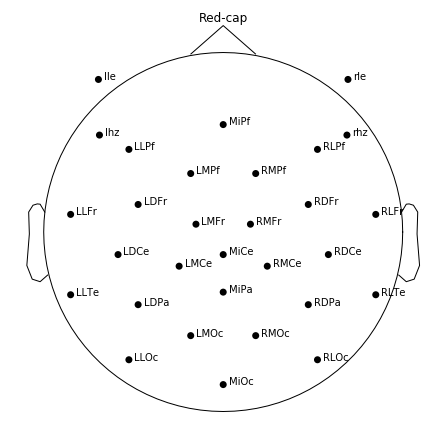

In [3]:
# plot montage
sfreq = 500
cap26 = pd.read_csv("/home/qiz001/zq/tt_eeglab/cap26.csv")
montage = streams2mne_digmont(cap26, eeg_streams)
montage.plot();

200 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


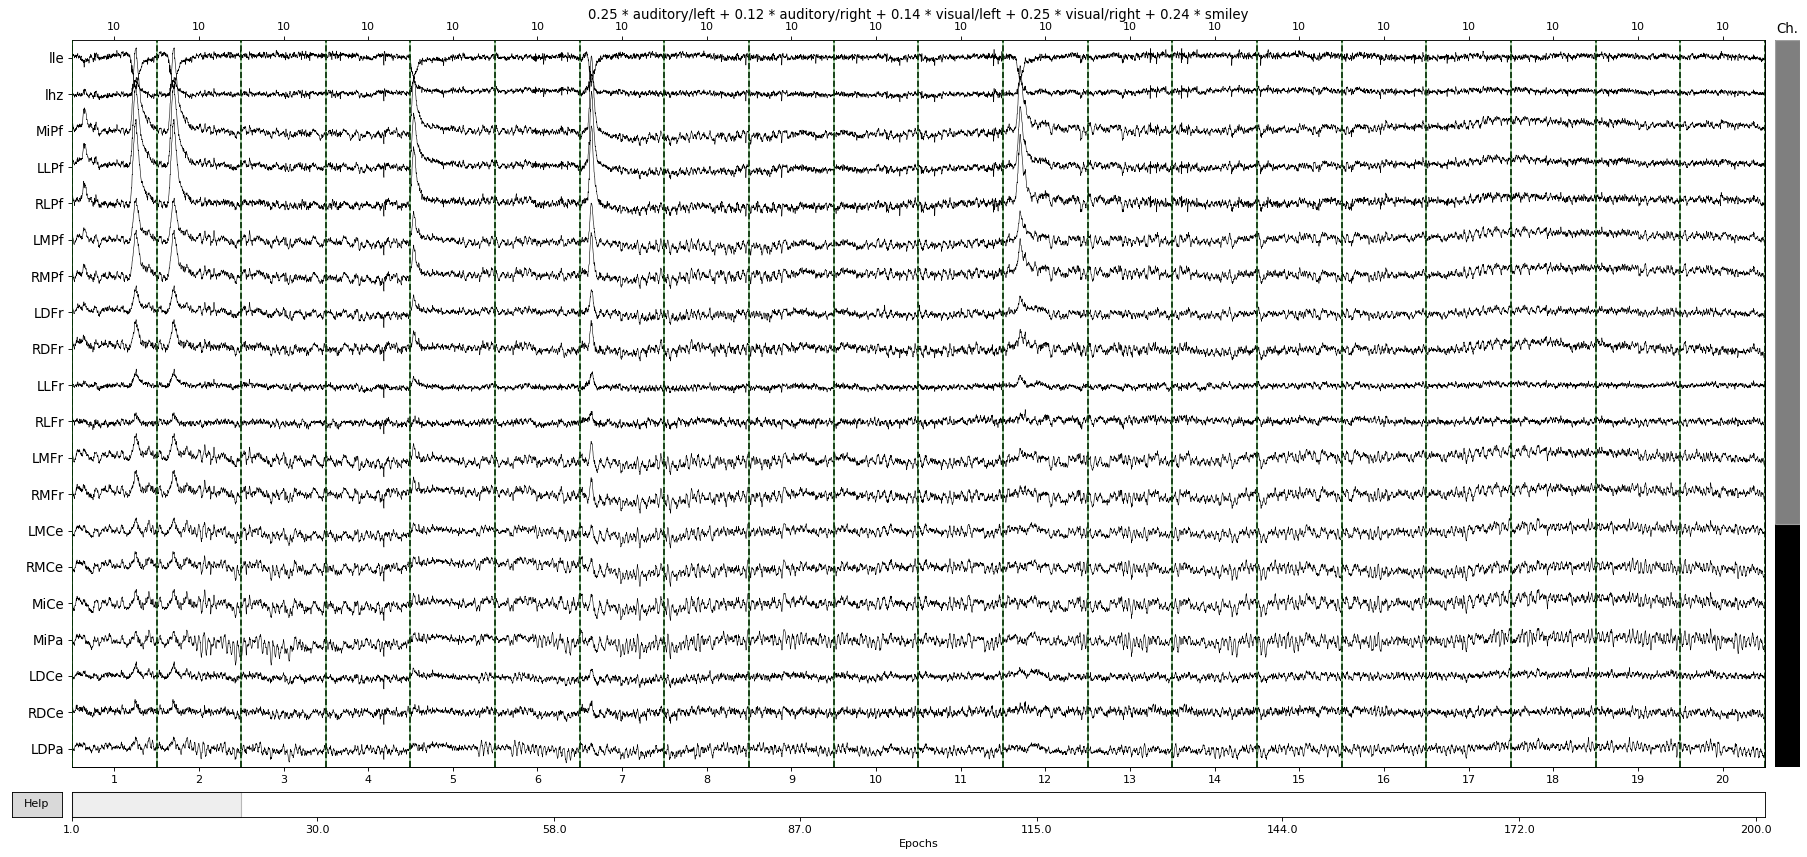

In [5]:
# create mne epochs from EpochsArray and show them
info = mne.create_info(
    montage.ch_names, sfreq=sfreq, ch_types="eeg", montage=montage
)

epochs = mne.EpochsArray(epochs_data, info=info, events=events, event_id=event_dict)

picks = mne.pick_types(info, meg=False, eeg=True, misc=False)

epochs.plot(picks=picks, scalings="auto", show=True, block=True);

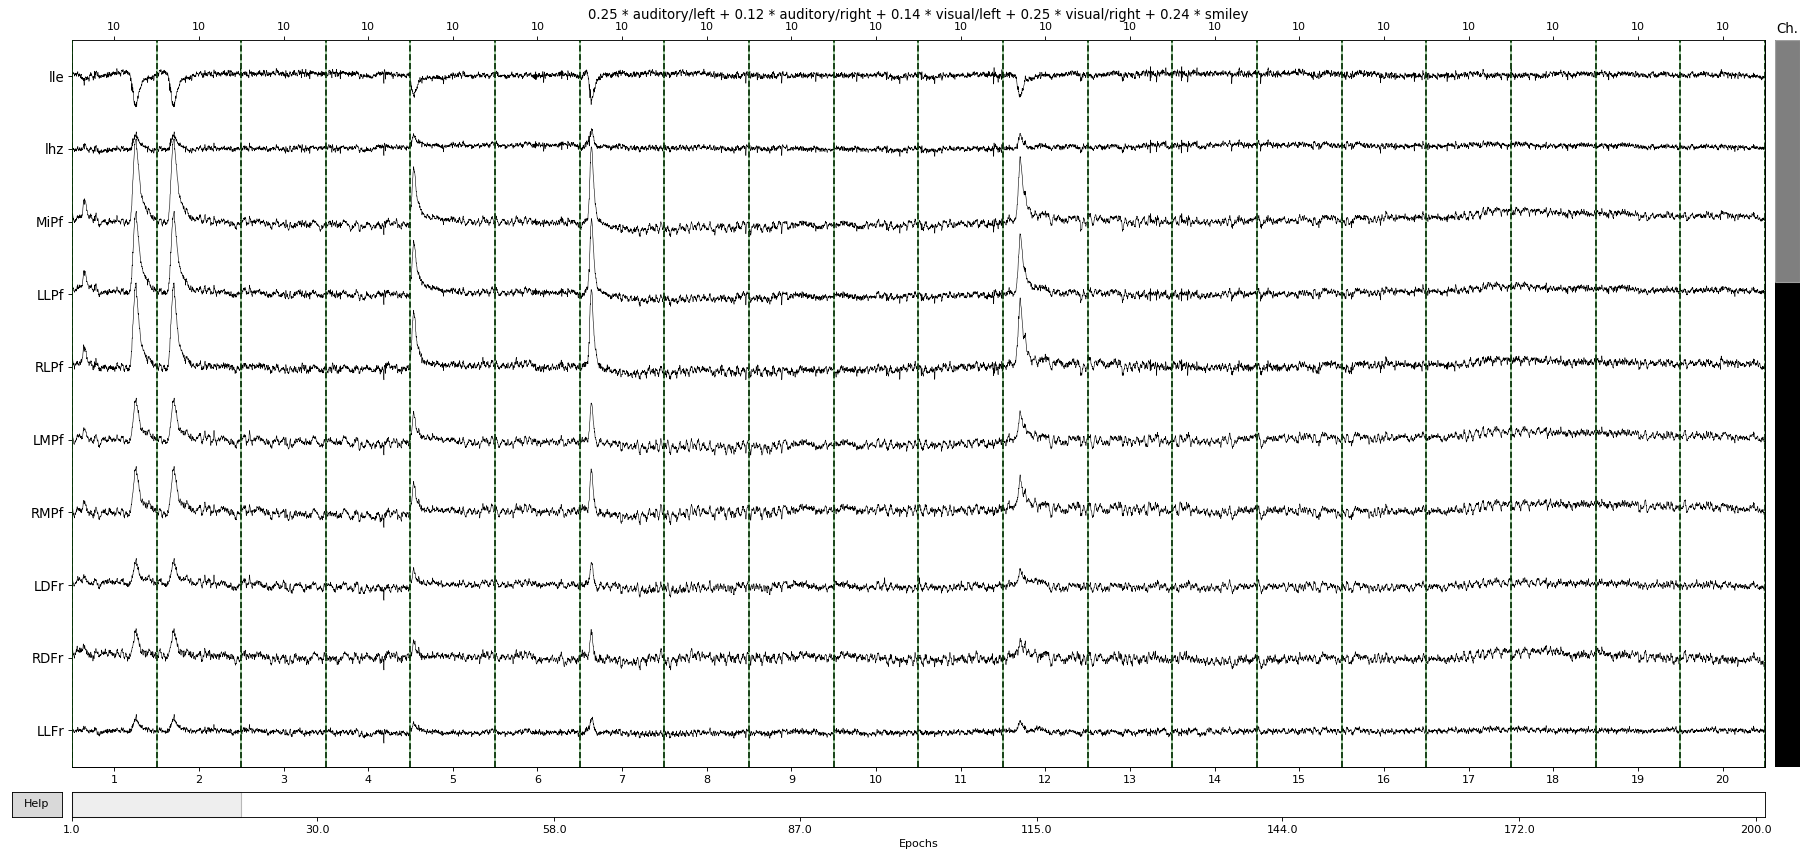

In [6]:
# show epochs 10 channels first
epochs.plot(picks=picks, scalings='auto', show=True, block=True,n_channels=10);

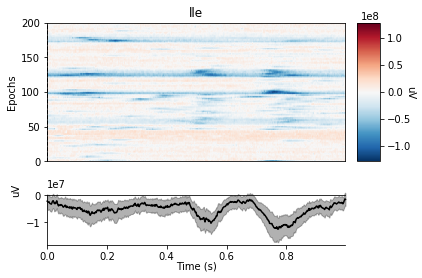

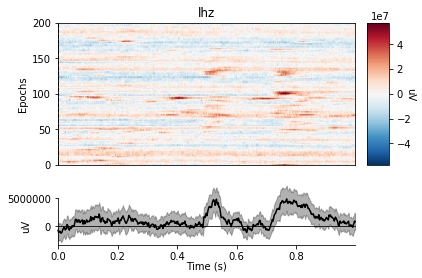

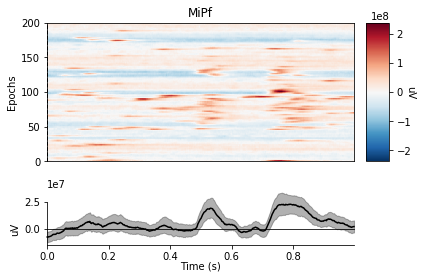

In [8]:
# To plot individual channels as an image
for i_channel in range(3):
    epochs.plot_image(i_channel, cmap="interactive", sigma=1.0);

200 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


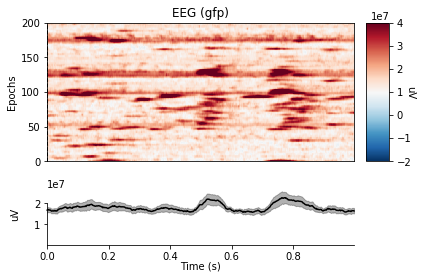

In [16]:
epochs.plot_image(cmap="interactive", sigma=1.5, vmin=-2e7, vmax=4.0e7);

No picks and no groupby, showing the first five channels ...
200 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


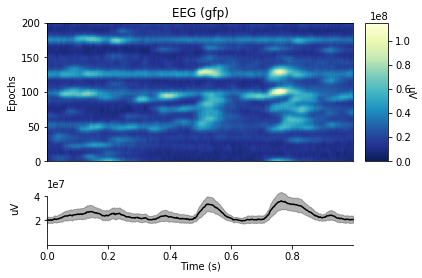

In [15]:
# To plot all channels by calculating the global field power
epochs.plot_image(combine="gfp", sigma=3.5, cmap="YlGnBu_r");

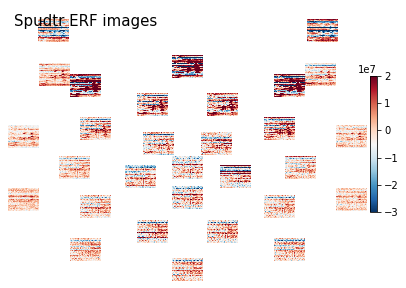

In [17]:
# plotting channelwise information arranged into a shape of the channel array.
epochs.plot_topo_image(
    vmin=-3e7,
    vmax=2.0e7,
    title="Spudtr ERF images",
    sigma=2.0,
    fig_facecolor="w",
    font_color="k",
);

    Using multitaper spectrum estimation with 7 DPSS windows


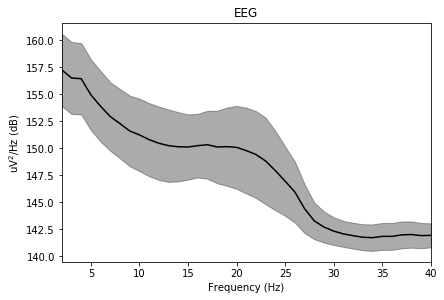

    Using multitaper spectrum estimation with 7 DPSS windows


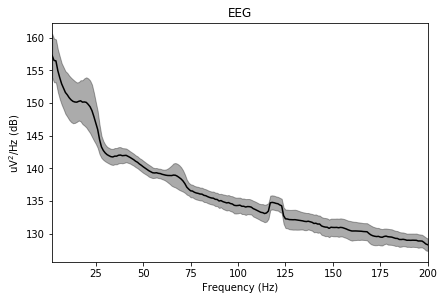

    Using multitaper spectrum estimation with 7 DPSS windows


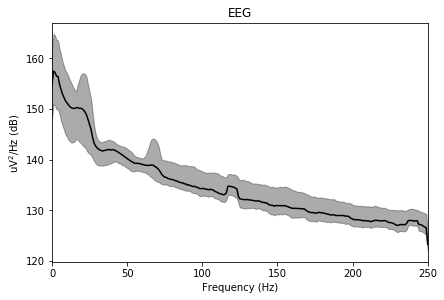

In [18]:
# power spectral density (psd), average spectrum by taking the mean across epochs
epochs.plot_psd(fmin=2.0, fmax=40.0)
epochs.plot_psd(fmin=2, fmax=200)
epochs.plot_psd(area_mode='range', tmax=10.0, show=True);

    Using multitaper spectrum estimation with 7 DPSS windows


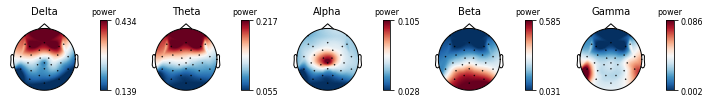

In [19]:
# the spatial distributions of the PSD in various frequency bands
epochs.plot_psd_topomap(ch_type="eeg", normalize=True)


nave = len(epochs_data)  # Number of averaged epochs
evoked_data = np.mean(epochs_data, axis=0)

evokeds = mne.EvokedArray(
    evoked_data, info=info, tmin=-0.2, comment="Arbitrary", nave=nave
);

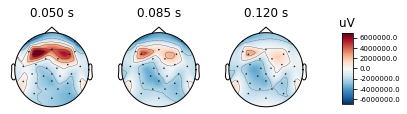

In [20]:
# showing topographies at specific time points:
times = np.arange(0.05, 0.151, 0.035)
evokeds.plot_topomap(times, ch_type="eeg", time_unit="s");

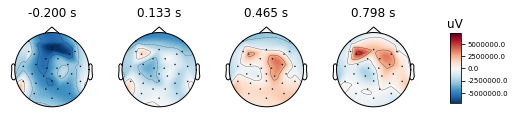

In [21]:
# If times is set to None at most 10 regularly spaced topographies will be shown:
evokeds.plot_topomap(ch_type="eeg", time_unit="s");

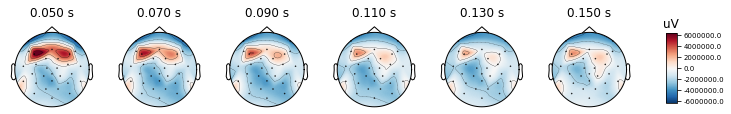

In [22]:
# compute averages of 50 ms bins centered on these time points to reduce the noise in the topographies:
times = np.arange(0.05, 0.151, 0.02)
evokeds.plot_topomap(times, ch_type="eeg", average=0.05, time_unit="s");

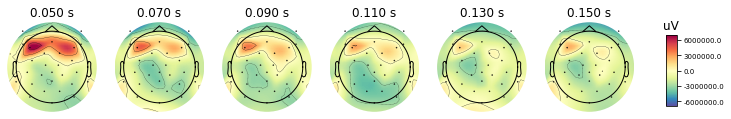

In [23]:
# Additional plot_topomap options
evokeds.plot_topomap(
    times,
    ch_type="eeg",
    cmap="Spectral_r",
    res=32,
    outlines="skirt",
    contours=4,
    time_unit="s",
);

Initializing animation...


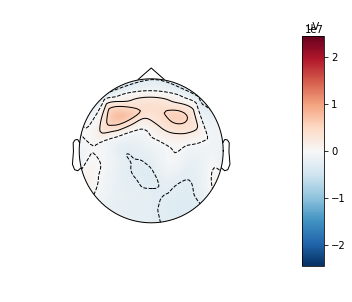

In [24]:
# Animating the topomap
evokeds.animate_topomap(
    ch_type="eeg", times=times, frame_rate=10, time_unit="s"
);

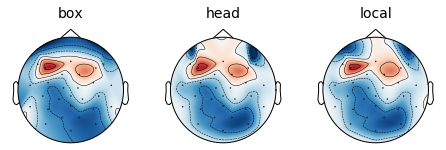

In [25]:
# various extrapolate, By default extrapolate='box' is used 
extrapolations = ["box", "head", "local"]
fig, axes = plt.subplots(figsize=(7.5, 2.5), ncols=3)
# Here we look at EEG channels, and use a custom head sphere to get all the
# sensors to be well within the drawn head surface
for ax, extr in zip(axes, extrapolations):
    evokeds.plot_topomap(
        0.1,
        ch_type="eeg",
        size=2,
        extrapolate=extr,
        axes=ax,
        show=False,
        colorbar=False,
    )
    ax.set_title(extr, fontsize=14);

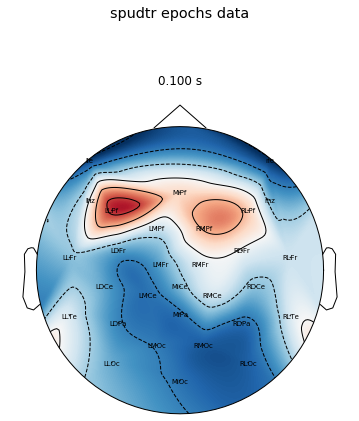

<Figure size 432x288 with 0 Axes>

In [26]:
# plot eeg data as topomap at a single time point, add channel labels, title and adjust plot margins
evokeds.plot_topomap(
    0.1,
    ch_type="eeg",
    show_names=True,
    colorbar=False,
    size=4,
    res=128,
    title="spudtr epochs data",
    time_unit="s",
)
plt.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.88);

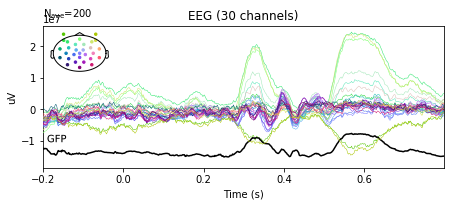

In [27]:
# Visualize Evoked data
evokeds.plot(spatial_colors=True, gfp=True, picks="eeg");

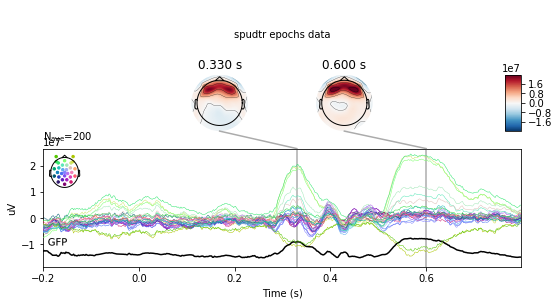

In [32]:
# combine the two kinds of plots in one figure to display of spatio-temporal dynamics
ts_args = dict(gfp=True, time_unit="s")
topomap_args = dict(sensors=False, time_unit="s")
evokeds.plot_joint(
    title="spudtr epochs data",
    times=[0.33, 0.6],
    ts_args=ts_args,
    topomap_args=topomap_args,
);

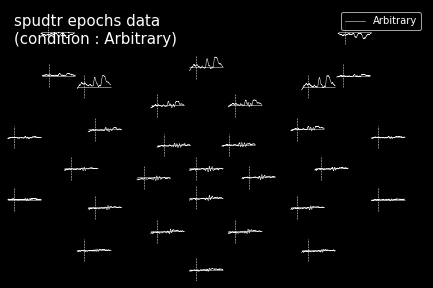

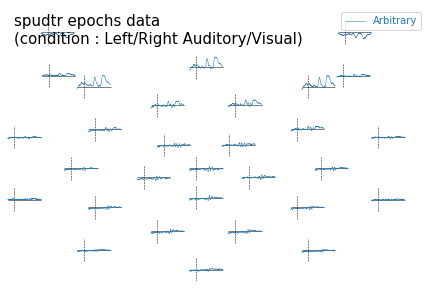

In [33]:
# plot the sensor data as a topographical view
title = "spudtr epochs data\n(condition : %s)"
evokeds.plot_topo(
    title=title % evokeds.comment, background_color="k", color=["white"]
)
mne.viz.plot_evoked_topo(
    evokeds, title=title % "Left/Right Auditory/Visual", background_color="w"
);

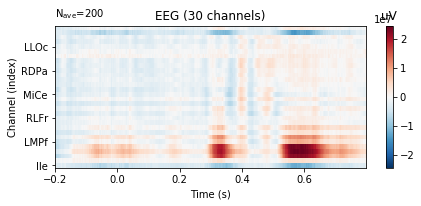

In [34]:
# plot the activations as images
evokeds.plot_image(exclude=[], time_unit="s");

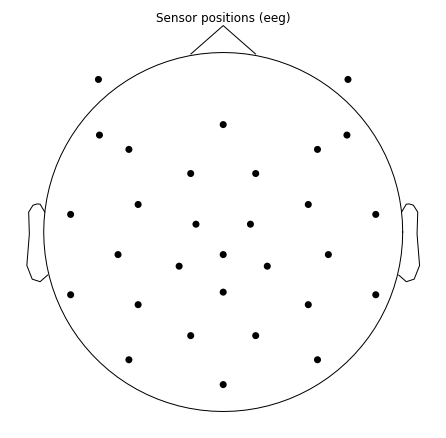

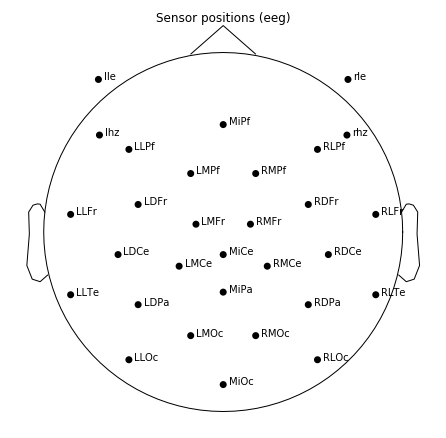

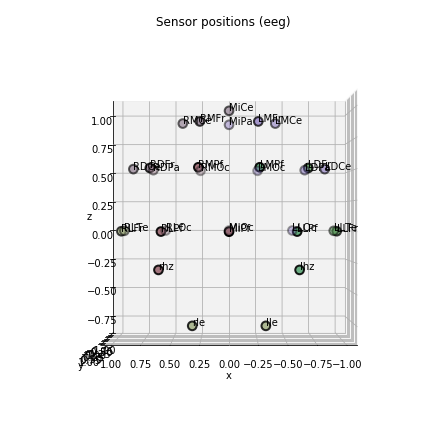

In [35]:
# Plot Sensor Position
evokeds.plot_sensors()
evokeds.plot_sensors(show_names=True)
#evokeds.plot_sensors('3d',show_names=True)
evokeds.plot_sensors(kind='3d',ch_type='eeg',ch_groups='position',show_names=True);

Applying baseline correction (mode: mean)


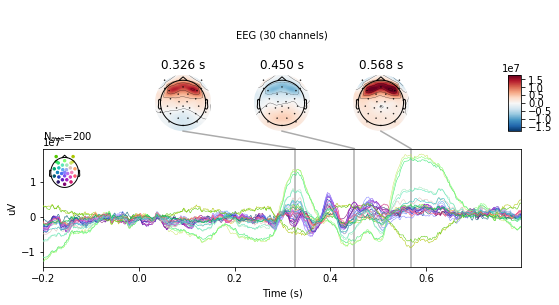

In [36]:
# Applying baseline correction (mode: mean)
evokeds.apply_baseline((None, None))
evokeds.plot_joint();

<ipython-input-37-4ec39f03402b>:27: RuntimeWarning: Some values in overlay_times fall outside of the epochs time interval (between 0.0 s and 0.998 s)
  show=True,
<ipython-input-37-4ec39f03402b>:27: RuntimeWarning: Some values in overlay_times fall outside of the epochs time interval (between 0.0 s and 0.998 s)
  show=True,


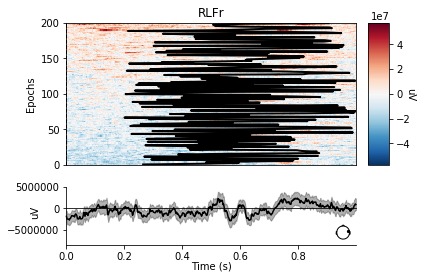

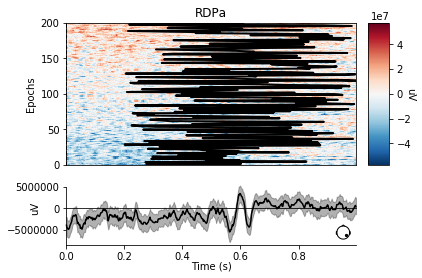

In [37]:
# Visualize channel over epochs as an image
from sklearn.manifold import spectral_embedding  # noqa
from sklearn.metrics.pairwise import rbf_kernel  # noqa

def order_func(times, data):
    this_data = data[:, (times > 0.0) & (times < 0.350)]
    this_data /= np.sqrt(np.sum(this_data ** 2, axis=1))[:, np.newaxis]
    return np.argsort(
        spectral_embedding(
            rbf_kernel(this_data, gamma=1.0), n_components=1, random_state=0
        ).ravel()
    )

good_pick = 10  # channel with a clear evoked response
bad_pick = 20  # channel with no evoked response

# We'll also plot a sample time onset for each trial
plt_times = np.linspace(1, 0.2, len(epochs))

plt.close("all")
mne.viz.plot_epochs_image(
    epochs,
    [good_pick, bad_pick],
    sigma=0.5,
    order=order_func,
    overlay_times=plt_times,
    show=True,
);

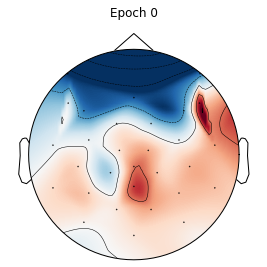

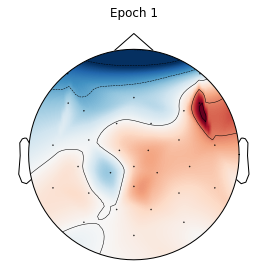

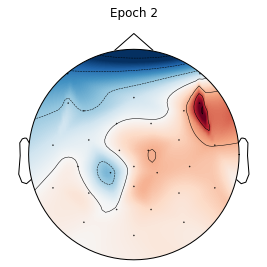

In [38]:
# plot topomap for epoch by epoch (average)
epochs_df_tmp = epochs_df.copy()

epochs_mean = epochs_df_tmp.groupby(["epoch_id"]).apply(
    lambda x: x[eeg_streams].mean(axis=0)
)

for epoch_i in range(3):
    y1 = epochs_mean.iloc[epoch_i, :]
    ya = list(y1.values)
    fig, ax = plt.subplots()
    mne.viz.plot_topomap(ya, info, axes=ax, show=False)
    ax.set(title=f"Epoch {epoch_i}");

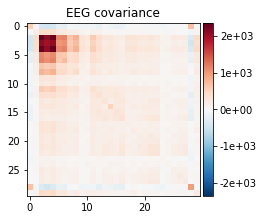

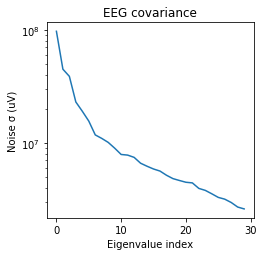

In [39]:
# Compute regularized noise covariance
noise_cov = mne.compute_covariance(epochs, tmax=10., method='shrunk', rank=None,
                                   verbose='error')
fig_cov, fig_spectra = mne.viz.plot_cov(noise_cov, info);

Computing data rank from covariance with rank=None
    Using tolerance 0.63 (2.2e-16 eps * 30 dim * 9.4e+13  max singular value)
    Estimated rank (eeg): 30
    EEG: rank 30 computed from 30 data channels with 0 projectors
Computing data rank from covariance with rank={'eeg': 30}
    Setting small EEG eigenvalues to zero (without PCA)
    Created the whitener using a noise covariance matrix with rank 30 (0 small eigenvalues omitted)


<ipython-input-40-1774cb4e1ca8>:2: RuntimeWarning: No average EEG reference present in info["projs"], covariance may be adversely affected. Consider recomputing covariance using with an average eeg reference projector added.
  evokeds.plot_white(noise_cov);


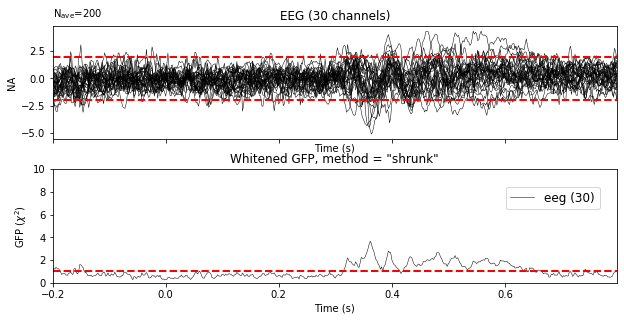

In [40]:
# Show whitening
evokeds.plot_white(noise_cov);

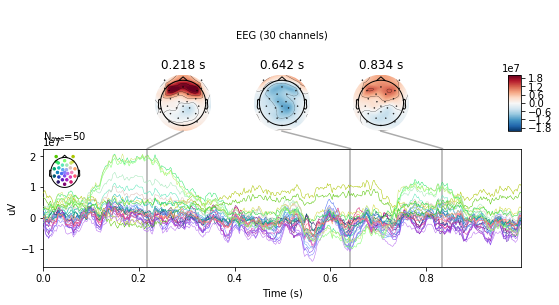

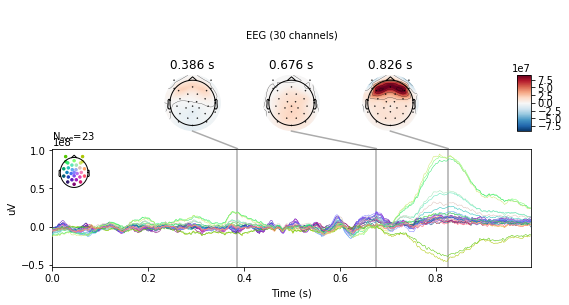

In [41]:
# select subsets of Epochs
av1 = epochs['auditory/left'].average()
av2 = epochs['auditory/right'].average()

joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
av1.plot_joint(show=False, **joint_kwargs)
av2.plot_joint(show=False, **joint_kwargs);

No picks, plotting the GFP ...


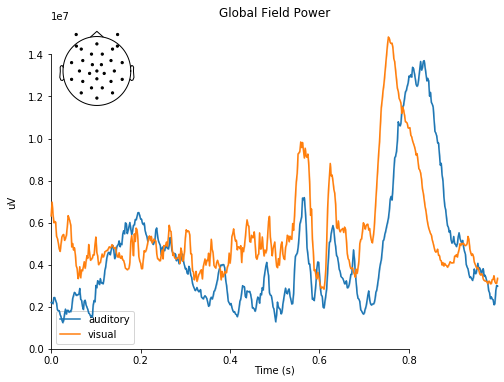

In [43]:
# Estimating evoked responses
aud_epochs = epochs['auditory']
vis_epochs = epochs['visual']

aud_evoked = aud_epochs.average()
vis_evoked = vis_epochs.average()

mne.viz.plot_compare_evokeds(dict(auditory=aud_evoked, visual=vis_evoked),
                              show_sensors='upper left');

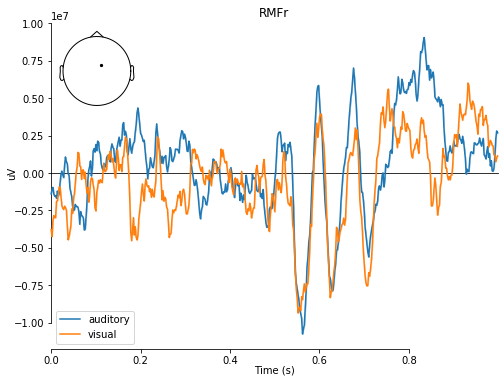

In [61]:
#  Estimating evoked responses for one channel
pick = aud_evoked.ch_names.index(eeg_streams[12])
mne.viz.plot_compare_evokeds(
    dict(auditory=aud_evoked, visual=vis_evoked), show_sensors="upper left", picks=pick, split_legend=False
);

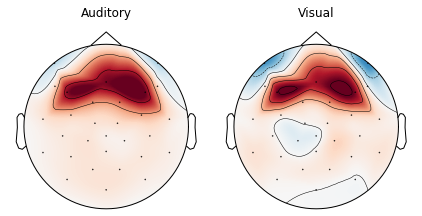

In [66]:
# compare two evokeds
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
aud_evoked.plot_topomap(
        0.8,
        ch_type="eeg",
        size=2,
        extrapolate=extr,
        axes=ax[0],
        show=False,
        colorbar=False
)
ax[0].set(title="Auditory")

vis_evoked.plot_topomap(
        0.8,
        ch_type="eeg",
        size=2,
        extrapolate=extr,
        axes=ax[1],
        show=False,
        colorbar=False
)
ax[1].set(title="Visual")
mne.viz.tight_layout()
plt.show()

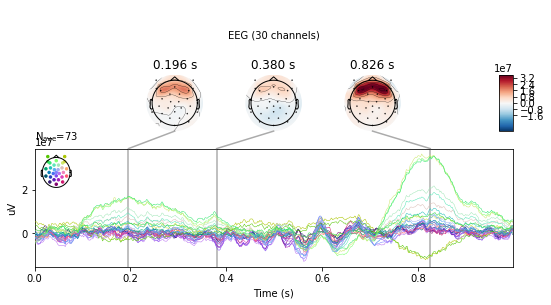

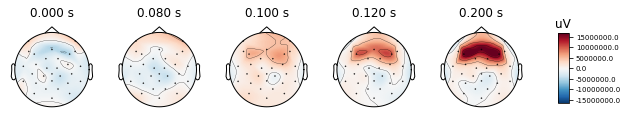

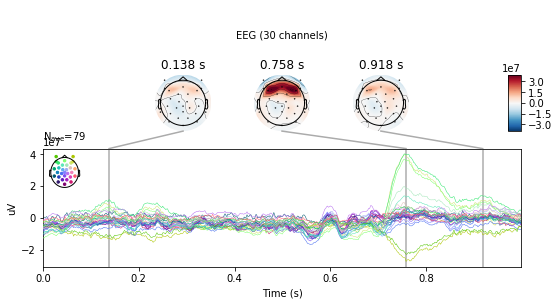

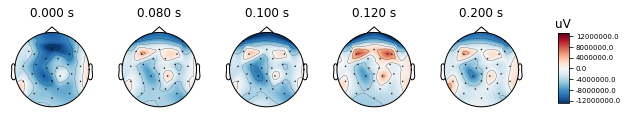

In [62]:
# view of each subsets of Evoked object
aud_evoked.plot_joint(picks='eeg')
aud_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg')

vis_evoked.plot_joint(picks='eeg')
vis_evoked.plot_topomap(times=[0., 0.08, 0.1, 0.12, 0.2], ch_type='eeg');

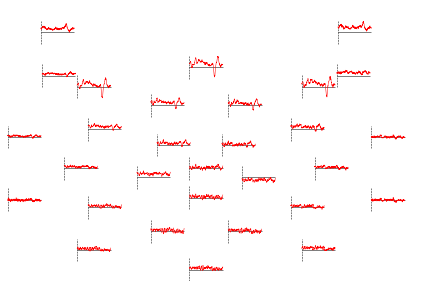

In [63]:
# Evoked objects can also be combined to show the difference wave
evoked_diff = mne.combine_evoked([aud_evoked, -vis_evoked], weights='equal')
evoked_diff.plot_topo(color='r', legend=False);

No picks, plotting the GFP ...


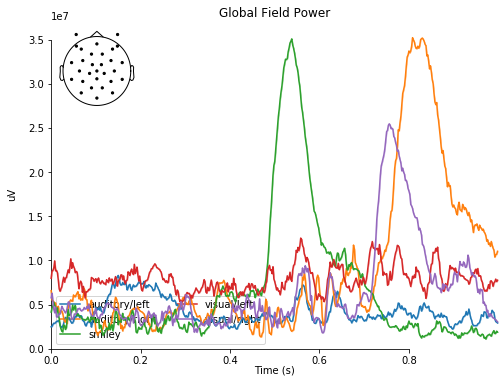

In [69]:
# plot compare evokeds
evokeds_dict = {cond: epochs[cond].average() for cond in event_dict}
fig = mne.viz.plot_compare_evokeds(evokeds_dict,
                              show_sensors='upper left')

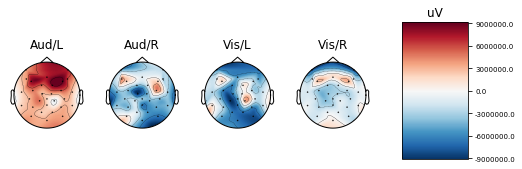

In [65]:
# Plotting topographic maps of evoked data for more advanced topomap plotting options
evoked_l_aud = epochs['auditory/left'].average()
evoked_r_aud = epochs['auditory/right'].average()
evoked_l_vis = epochs['visual/left'].average()
evoked_r_vis = epochs['visual/right'].average()

fig, ax = plt.subplots(1, 5, figsize=(8, 2))
kwargs = dict(times=0.1, show=False, time_unit='s')
evoked_l_aud.plot_topomap(axes=ax[0], colorbar=True, **kwargs)
evoked_r_aud.plot_topomap(axes=ax[1], colorbar=False, **kwargs)
evoked_l_vis.plot_topomap(axes=ax[2], colorbar=False, **kwargs)
evoked_r_vis.plot_topomap(axes=ax[3], colorbar=False, **kwargs)
for ax, title in zip(ax[:4], ['Aud/L', 'Aud/R', 'Vis/L', 'Vis/R']):
    ax.set_title(title)
plt.show()